<a href="https://colab.research.google.com/github/rabeetmalik09/car-price/blob/main/Copy_of_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

car_data= pd.read_csv('car_data.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [103]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [104]:
# first five rows of data

#now getting more information about data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [105]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [106]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [107]:
car_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [108]:
print(car_data['fuel'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [10]:
print(car_data['seller_type'].value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [109]:
print(car_data['transmission'].value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [110]:
print(car_data['owner'].value_counts())

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [111]:
print(car_data['km_driven'].value_counts())

70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: km_driven, Length: 770, dtype: int64


In [112]:
print(car_data['year'].value_counts())

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64


In [113]:
print(car_data['name'].value_counts())

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64


In [114]:
fuel_type = car_data['fuel']
seller_type = car_data['seller_type']
transmission_type = car_data['transmission']
selling_price = car_data['selling_price']

This code uses Matplotlib to create a figure with three subplots, each visualizing the relationship between a categorical variable and the selling price.**italicized text**

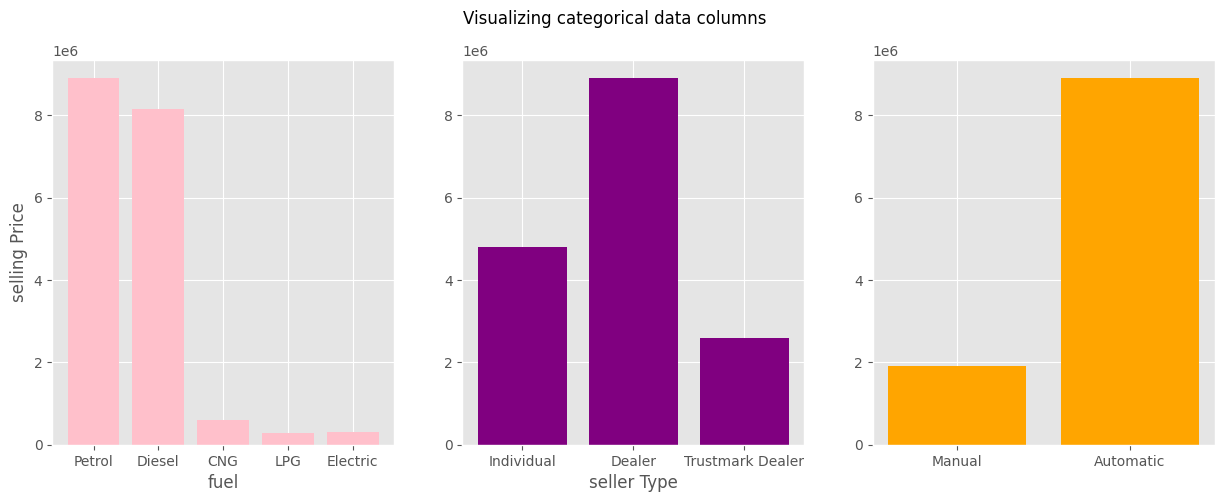

In [115]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='pink')
plt.xlabel("fuel")
plt.ylabel("selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='purple')
plt.xlabel("seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='orange')
plt.show()


using Seaborn to create a figure with three subplots, each visualizing the relationship between a categorical variable and the selling price

,year,selling_price,km_driven
count,994.000000,9.940000e+02,994.000000
mean,2014.200201,7.218229e+05,52827.259557
std,3.332098,8.599559e+05,47552.761406
min,1998.000000,2.200000e+04,101.000000
25%,2012.000000,3.100000e+05,27337.500000
50%,2015.000000,4.950000e+05,49000.000000
75%,2017.000000,7.500000e+05,66000.000000
max,2020.000000,8.900000e+06,806599.000000


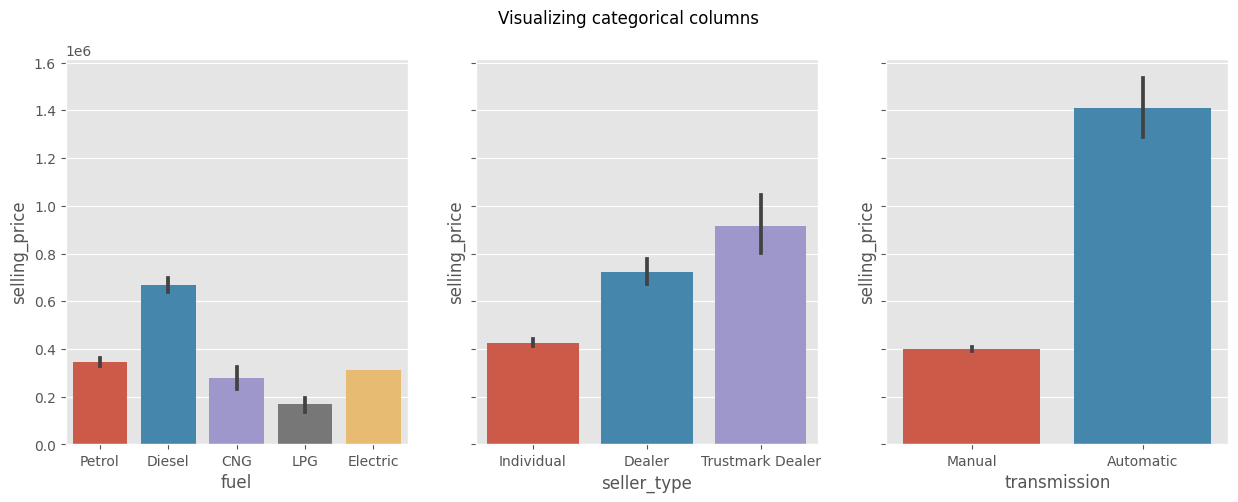

In [116]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

petrol_data = car_data.groupby('fuel').get_group('Petrol')
petrol_data.describe()

seller_data = car_data.groupby('seller_type').get_group('Dealer')
seller_data.describe()


<ipython-input-117-2652e6706359>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


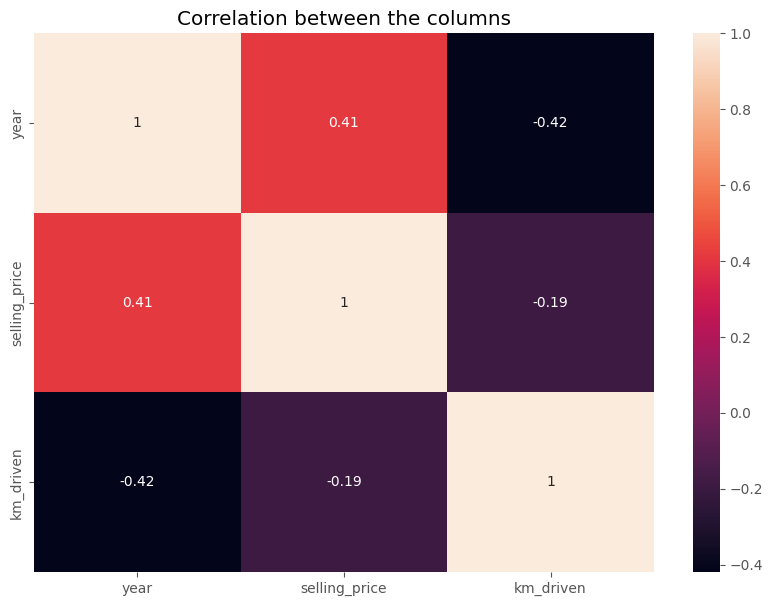

In [117]:

car_data.replace({'fuel_type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)



plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()





<Axes: title={'center': 'Correlation kilometers driven and selling price'}, xlabel='km_driven', ylabel='selling_price'>

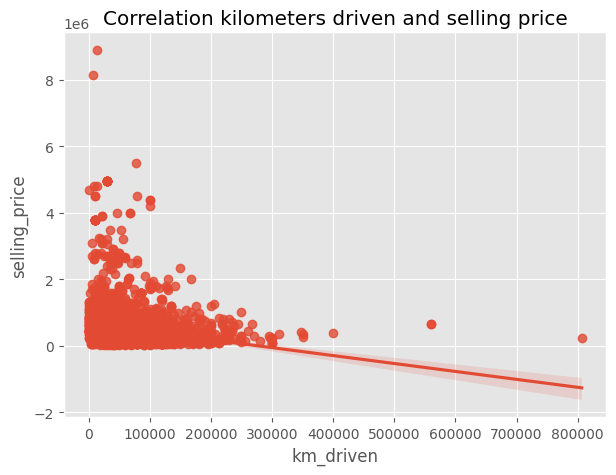

In [118]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation kilometers driven and selling price')
sns.regplot(x='km_driven', y='selling_price', data=car_data)


This code is preparing data for a machine learning model by splitting the features (X) and the target variable (y) into training and testing sets using the train_test_split function.bold text

In [119]:
X = car_data.drop(['name','selling_price'], axis=1)
y = car_data['selling_price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)


Shape of X is:  (4340, 6)
Shape of y is:  (4340,)
X_test shape: (1302, 6)
X_train shape: (3038, 6)
y_test shape:  (1302,)
y_train shape: (3038,)


In [120]:
#data cleaning
car_data.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [121]:
car_data['name'].str.lstrip()

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

In [122]:
#applying conditions
if 'Petrol' in car_data['fuel'].unique():
    petrol_data = car_data.groupby('fuel').get_group('Petrol')
    petrol_data.describe()

if 'seller_type' in car_data.columns:
    seller_type= car_data.groupby('seller_type').get_group('Dealer')
    seller_type.describe()

In [147]:
#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_data.replace({'seller_type':{'Dealer':0, 'Indivisual':1}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['seller_type', 'transmission'], drop_first=True)

In [148]:
from sklearn.preprocessing import StandardScaler

# Check if 'fuel' is in the columns before applying get_dummies
if 'fuel' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['fuel'], drop_first=True)
else:
    print("Column 'fuel' not found in X_train")

if 'fuel' in X_test.columns:
    X_test = pd.get_dummies(X_test, columns=['fuel'], drop_first=True)
else:
    print("Column 'fuel' not found in X_test")

# Ensure that 'fuel' is present in both X_train and X_test after get_dummies
common_columns = set(X_train.columns) & set(X_test.columns)

# Check if there are any common columns left
if common_columns:
    # Filter X_train and X_test to keep only common columns
    X_train = X_train[common_columns]
    X_test = X_test[common_columns]

    # Ensure that all values are numeric
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    # Drop any columns with NaN values
    X_train = X_train.dropna(axis=1, how='any')
    X_test = X_test.dropna(axis=1, how='any')

    scaler = StandardScaler()

    # Check if there are any columns in X_train
    if X_train.shape[1] > 0:
        X_train = scaler.fit_transform(X_train)
    else:
        print("No columns in X_train after get_dummies and numeric conversion")

    # Check if there are any columns in X_test
    if X_test.shape[1] > 0:
        X_test = scaler.transform(X_test)
    else:
        print("No columns in X_test after get_dummies and numeric conversion")
else:
    print("No common columns between X_train and X_test after get_dummies")


Column 'fuel' not found in X_train
Column 'fuel' not found in X_test


<ipython-input-148-66cd3e0f4e15>:20: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = X_train[common_columns]
<ipython-input-148-66cd3e0f4e15>:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = X_test[common_columns]


In [151]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

 calculating and printing
  three regression performance metrics—Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2 score)—for a machine learning model's predictions (pred) compared to the actual target values (y_test). Additionally, it generates a regression plot using Seaborn to visually compare predicted and actual prices.



MAE:  253757.62471795687
MSE:  227449392669.6209
R2 score:  -1.6395016884926794


Text(0.5, 1.0, 'ACtual vs predicted price')

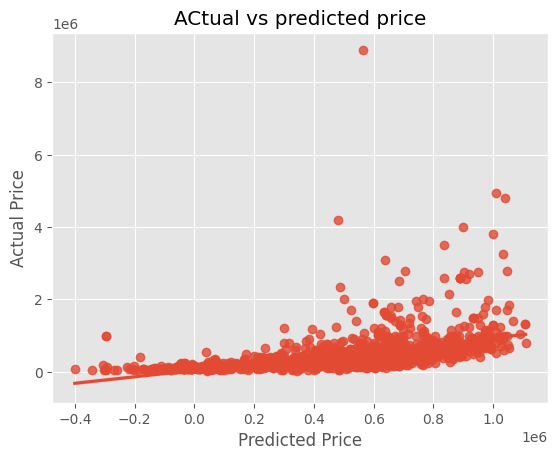

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")